### 1. Importing the relevant packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.pyplot as plt  # Graphics
import seaborn  # Graphics
import pandas  # Tabular data manipulation
from pysal.explore import esda  # Exploratory Spatial analytics
from pysal.lib import weights
from splot import esda as esdaplot
from shapely import wkt

/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/spaghetti/network.py:39: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(f"{dep_msg}", FutureWarning)


### 2. Reading in the data & preparing the data

In [2]:
crime_df = pd.read_csv('MPS Ward Level Crime (most recent 24 months)(1).csv')
civic_score = pd.read_csv('civic_score_shape.csv')
LSOA_crime = pd.read_csv('MSOA_crime.csv')
LSOA_spatial = gpd.read_file('LNDN_SHP/LDN-LSOAs.shp')

In [3]:
#Building a dataframe of recent time crimes
# list of strings
lst = ['2015', '2016', '2017', '2018', '2019', '2020', '2021','2022']
# list of int
lst2 = [87, 89 , 94, 98, 102, 83,93,108]
# Calling DataFrame constructor after zipping
# both lists, with columns specified
Crime_rate = pd.DataFrame(list(zip(lst, lst2)),columns =['Year', 'Crime Rate'])

In [4]:
#Here I am going to prepare the civic score CSV from a dataframe and chnage into a GeoDataFrame

civic_score.dropna(inplace=True)
civic_score['geometry'] = civic_score['geometry'].apply(wkt.loads)
gdf_civic = gpd.GeoDataFrame(civic_score)
gdf_civic

,geometry,Civic_score
0,"POLYGON ((543595.500 184832.800, 543601.700 18...",29.2
1,"POLYGON ((525122.600 170480.900, 525185.400 17...",66.9
2,"POLYGON ((527370.800 183470.700, 527336.900 18...",39.7
3,"POLYGON ((546122.300 179468.500, 546212.900 17...",59.0
4,"POLYGON ((525669.000 178860.700, 525604.000 17...",65.6
...,...,...
637,"POLYGON ((519891.500 179005.500, 519928.800 17...",47.8
638,"POLYGON ((532101.700 176563.700, 532100.200 17...",65.0
639,"POLYGON ((534064.800 173736.900, 534087.800 17...",65.0
640,"POLYGON ((532464.700 180566.600, 532452.600 18...",32.0


### 3. Exploring all the data

In [5]:
# Checking for any nulls and data types amd
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23557 entries, 0 to 23556
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   MajorText           23557 non-null  object
 1   MinorText           23557 non-null  object
 2   WardName            23557 non-null  object
 3   WardCode            23557 non-null  object
 4   LookUp_BoroughName  23557 non-null  object
 5   202011              23557 non-null  int64 
 6   202012              23557 non-null  int64 
 7   202101              23557 non-null  int64 
 8   202102              23557 non-null  int64 
 9   202103              23557 non-null  int64 
 10  202104              23557 non-null  int64 
 11  202105              23557 non-null  int64 
 12  202106              23557 non-null  int64 
 13  202107              23557 non-null  int64 
 14  202108              23557 non-null  int64 
 15  202109              23557 non-null  int64 
 16  202110              23

In [6]:
#This is to get the columns in a list so that I can drop the ones I do not need
crime_df.columns

Index(['MajorText', 'MinorText', 'WardName', 'WardCode', 'LookUp_BoroughName',
       '202011', '202012', '202101', '202102', '202103', '202104', '202105',
       '202106', '202107', '202108', '202109', '202110', '202111', '202112',
       '202201', '202202', '202203', '202204', '202205', '202206', '202207',
       '202208', '202209', '202210'],
      dtype='object')

In [7]:
#Checking the data structure and just getting my head around what it looks like
crime_df.head()

,MajorText,MinorText,WardName,WardCode,LookUp_BoroughName,202011,202012,202101,202102,202103,...,202201,202202,202203,202204,202205,202206,202207,202208,202209,202210
0,Arson and Criminal Damage,Arson,Heathrow Villages,E05013570,Aviation Security (SO18),0,1,0,0,0,...,2,0,0,0,0,3,1,1,0,0
1,Arson and Criminal Damage,Criminal Damage,Heathrow Villages,E05013570,Aviation Security (SO18),17,12,13,8,12,...,18,25,23,19,16,6,12,23,12,16
2,Burglary,Burglary Business and Community,Heathrow Villages,E05013570,Aviation Security (SO18),3,3,3,4,3,...,0,1,4,1,2,1,3,3,3,1
3,Burglary,Domestic Burglary,Heathrow Villages,E05013570,Aviation Security (SO18),10,5,4,8,4,...,3,6,3,5,6,7,4,2,6,6
4,Drug Offences,Drug Trafficking,Heathrow Villages,E05013570,Aviation Security (SO18),2,1,3,0,1,...,0,4,2,2,1,2,0,6,1,1


In [8]:
#Creating a summation column summing all of the counts of each crime
crime_df['Total'] = crime_df.sum(axis=1)
crime_df

,MajorText,MinorText,WardName,WardCode,LookUp_BoroughName,202011,202012,202101,202102,202103,...,202202,202203,202204,202205,202206,202207,202208,202209,202210,Total
0,Arson and Criminal Damage,Arson,Heathrow Villages,E05013570,Aviation Security (SO18),0,1,0,0,0,...,0,0,0,0,3,1,1,0,0,10
1,Arson and Criminal Damage,Criminal Damage,Heathrow Villages,E05013570,Aviation Security (SO18),17,12,13,8,12,...,25,23,19,16,6,12,23,12,16,365
2,Burglary,Burglary Business and Community,Heathrow Villages,E05013570,Aviation Security (SO18),3,3,3,4,3,...,1,4,1,2,1,3,3,3,1,47
3,Burglary,Domestic Burglary,Heathrow Villages,E05013570,Aviation Security (SO18),10,5,4,8,4,...,6,3,5,6,7,4,2,6,6,134
4,Drug Offences,Drug Trafficking,Heathrow Villages,E05013570,Aviation Security (SO18),2,1,3,0,1,...,4,2,2,1,2,0,6,1,1,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23552,Vehicle Offences,Interfering with a Motor Vehicle,Westbourne,E05013809,Westminster,2,0,0,1,0,...,1,4,0,0,1,1,0,0,0,14
23553,Vehicle Offences,Theft from a Motor Vehicle,Westbourne,E05013809,Westminster,2,4,5,3,5,...,8,7,2,6,7,1,2,2,4,81
23554,Vehicle Offences,Theft or Taking of a Motor Vehicle,Westbourne,E05013809,Westminster,3,2,0,0,3,...,2,3,1,4,2,3,0,2,1,44
23555,Violence Against the Person,Violence with Injury,Westbourne,E05013809,Westminster,7,8,5,7,4,...,13,14,8,12,7,9,19,7,8,228


In [9]:
#I am going to create a stream lined data frame to work with  just the aggregate and the non-numerical data
crime_df_streamlined = crime_df.drop(columns=['202011', '202012', '202101', '202102', '202103', '202104', '202105', '202106', '202107', '202108', '202109', '202110', '202111', '202112','202201', '202202', '202203', '202204', '202205', '202206', '202207','202208', '202209', '202210']).copy()

In [10]:
#Checking out the new data as a head()
crime_df_streamlined.head(2000)

,MajorText,MinorText,WardName,WardCode,LookUp_BoroughName,Total
0,Arson and Criminal Damage,Arson,Heathrow Villages,E05013570,Aviation Security (SO18),10
1,Arson and Criminal Damage,Criminal Damage,Heathrow Villages,E05013570,Aviation Security (SO18),365
2,Burglary,Burglary Business and Community,Heathrow Villages,E05013570,Aviation Security (SO18),47
3,Burglary,Domestic Burglary,Heathrow Villages,E05013570,Aviation Security (SO18),134
4,Drug Offences,Drug Trafficking,Heathrow Villages,E05013570,Aviation Security (SO18),39
...,...,...,...,...,...,...
1995,Theft,Bicycle Theft,Slade Green & Northend,E05011231,Bexley,6
1996,Theft,Other Theft,Slade Green & Northend,E05011231,Bexley,302
1997,Theft,Shoplifting,Slade Green & Northend,E05011231,Bexley,22
1998,Theft,Theft from Person,Slade Green & Northend,E05011231,Bexley,14


In [11]:
#Checking for unique crime areas
crime_df_streamlined['MinorText'].value_counts()

Domestic Burglary                                     679
Violence with Injury                                  679
Possession of Drugs                                   679
Other Theft                                           679
Theft or Taking of a Motor Vehicle                    679
Theft from a Motor Vehicle                            679
Interfering with a Motor Vehicle                      679
Racially or Religiously Aggravated Public Fear, Al    679
Public Fear Alarm or Distress                         679
Criminal Damage                                       679
Rape                                                  679
Other Sexual Offences                                 679
Violence without Injury                               679
Other Offences Against the State, or Public Order     678
Obscene Publications                                  678
Burglary Business and Community                       678
Robbery of Personal Property                          678
Theft from Per

In [12]:
#Creating a pivoted data frame to rearrange the data so that it can be used for later data insights
df = crime_df_streamlined.pivot(index='WardCode', columns='MinorText', values='Total').reset_index()

In [13]:
#Creating a list of the ward names and codes
crime_df_name = crime_df_streamlined[['WardName','WardCode']].copy()
crime_df_name.drop_duplicates(inplace=True)

In [14]:
#Merging the datasets together
df_joined = pd.merge(df,crime_df_name)

<AxesSubplot:>

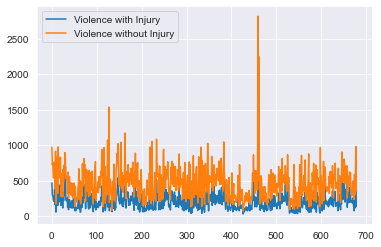

In [15]:
#Creating a quick little visualisation to make sure that all has gone well
df_joined[['Violence with Injury','Violence without Injury']].plot()

In [16]:
#Filling in the null values with 0s
df_joined.fillna(0,inplace=True)

In [17]:
## Creating the bins to group the crimes
Arson_and_Criminal_Damage = ['Arson','Criminal Damage']
Burglary = ['Burglary Business and Community' ]
Drug_Offences = ['Drug Trafficking' , 'Possession of Drugs']
Crimes_Against_Society = ['Absconding from Lawful Custody' , 'Bail Offences' , 'Bigamy' , 'Dangerous Driving' , 'Disclosure, Obstruction, False or Misleading State', 'Exploitation of Prostitution' , 'Forgery or Use of Drug Prescription' , 'Fraud or Forgery Associated with Driver Records' , 'Going Equipped for Stealing' , 'Handling Stolen Goods', 'Making, Supplying or Possessing Articles for use i', 'Obscene Publications' , 'Offender Management Act' , 'Other Forgery' , 'Other Notifiable Offences' , 'Perjury' , 'Perverting Course of Justice' , 'Possession of False Documents' , 'Profitting From or Concealing Proceeds of Crime' , 'Soliciting for Prostitution' , 'Threat or Possession With Intent to Commit Crimina' ,'Wildlife Crime']
Possession_of_Weapons = ['Other Firearm Offences' , 'Possession of Firearm with Intent' , 'Possession of Firearms Offences' , 'Possession of Other Weapon' , 'Possession of Article with Blade or Point' ]
Public_Order_Offences=[ 'Other Offences Against the State, or Public Order' , 'Public Fear Alarm or Distress' , 'Racially or Religiously Aggravated Public Fear, Al' , 'Violent Disorder']
Robbery = [ 'Robbery of Business Property' , 'Robbery of Personal Property']
Theft = [ 'Bicycle Theft' , 'Other Theft' , 'Shoplifting' , 'Theft from Person']
Vehicle_Offences = ['Aggravated Vehicle Taking' ,'Interfering with a Motor Vehicle' ,'Theft from a Motor Vehicle' , 'Theft or Taking of a Motor Vehicle']
Violence_Against_the_Person= ['Homicide' , 'Violence with Injury' , 'Violence without Injury']

#Adding the crimes into their relevant groups
df_joined['Arson_and_Criminal_Damage'] = df_joined[Arson_and_Criminal_Damage].sum(axis=1)
df_joined['Burglary'] = df_joined[Burglary].sum(axis=1)
df_joined['Drug_Offences'] = df_joined[Drug_Offences].sum(axis=1)
df_joined['Crimes_Against_Society'] = df_joined[Crimes_Against_Society].sum(axis=1)
df_joined['Possession_of_Weapons'] = df_joined[Possession_of_Weapons].sum(axis=1)
df_joined['Public_Order_Offences'] = df_joined[Public_Order_Offences].sum(axis=1)
df_joined['Robbery'] = df_joined[Robbery].sum(axis=1)
df_joined['Theft'] = df_joined[Theft].sum(axis=1)
df_joined['Vehicle_Offences'] = df_joined[Vehicle_Offences].sum(axis=1)
df_joined['Violence_Against_the_Person'] = df_joined[Violence_Against_the_Person].sum(axis=1)

### Point of note

Repeating all the above steps for the ward level at the LSOA level.This happened as when assessing the data the recorded ward names and the relevant names available for creating the geodataframe do not match as the Police record. Therefore to generate maps the lowest level of spatial aggregation is used.This is in part to the changes made to the WARD boundaries and not being updated in an appropriate manner across the public sectors

In [18]:
#Creating a summation of the crime
LSOA_crime['Total'] = LSOA_crime.sum(axis=1)
#Dropping uneeded columns
LSOA_df_streamlined = LSOA_crime.drop(
    columns=['202011', '202012', '202101', '202102', '202103', '202104', '202105', '202106', '202107', '202108',
             '202109', '202110', '202111', '202112', '202201', '202202', '202203', '202204', '202205', '202206',
             '202207', '202208', '202209', '202210']).copy()
#Creating the pivot table
LSOA_piv = LSOA_df_streamlined.pivot(index='LSOA Code', columns='Minor Category', values='Total').reset_index()
#filling the null vlaues
LSOA_piv.fillna(0, inplace=True)
#Merging the spatial maps and pivot table
LSOA_map = pd.merge(LSOA_piv, LSOA_spatial, left_on='LSOA Code', right_on='lsoa11cd')
#setting the geometry so it becomes a spatial file
LSOA_map_g = gpd.GeoDataFrame(LSOA_map, geometry='geometry')
#Adding the crimes into their relevant groups
LSOA_map_g['Arson_and_Criminal_Damage'] = LSOA_map_g[Arson_and_Criminal_Damage].sum(axis=1)
LSOA_map_g['Burglary'] = LSOA_map_g[Burglary].sum(axis=1)
LSOA_map_g['Drug_Offences'] = LSOA_map_g[Drug_Offences].sum(axis=1)
LSOA_map_g['Crimes_Against_Society'] = LSOA_map_g[Crimes_Against_Society].sum(axis=1)
LSOA_map_g['Possession_of_Weapons'] = LSOA_map_g[Possession_of_Weapons].sum(axis=1)
LSOA_map_g['Public_Order_Offences'] = LSOA_map_g[Public_Order_Offences].sum(axis=1)
LSOA_map_g['Robbery'] = LSOA_map_g[Robbery].sum(axis=1)
LSOA_map_g['Theft'] = LSOA_map_g[Theft].sum(axis=1)
LSOA_map_g['Vehicle_Offences'] = LSOA_map_g[Vehicle_Offences].sum(axis=1)
LSOA_map_g['Violence_Against_the_Person'] = LSOA_map_g[Violence_Against_the_Person].sum(axis=1)

In [19]:
#Building a total crime column
total_crimes = ['Arson_and_Criminal_Damage',
                'Burglary', 'Drug_Offences', 'Crimes_Against_Society',
                'Possession_of_Weapons', 'Public_Order_Offences', 'Robbery', 'Theft',
                'Vehicle_Offences', 'Violence_Against_the_Person']
LSOA_map_g['total_crime']= LSOA_map_g[total_crimes].sum(axis=1)

In [20]:
#Building a dataframe of recent crime counts
# list of strings
lst = ['Arson_and_Criminal_Damage',
       'Burglary', 'Drug_Offences', 'Crimes_Against_Society',
       'Possession_of_Weapons', 'Public_Order_Offences', 'Robbery', 'Theft',
       'Vehicle_Offences', 'Violence_Against_the_Person']
# list of int
lst2 = [103624.0,
        27386.0,
        89257.0,
        22448.0,
        11944.0,
        113676.0,
        47932.0,
        388903.0,
        203695.0,
        458077.0]
# Calling DataFrame constructor after zipping
# both lists, with columns specified
Crime_count = pd.DataFrame(list(zip(lst, lst2)), columns=['Crime', 'Crime Count'])
Crime_count
#Just sorting them for visualisation later
Crime_count = Crime_count.sort_values('Crime Count')

### 4. Visualising the data in a non-spatial capacity

In this section of the notebook it is about exploring the data and the trends that exist within the non-spatial capacity of the data

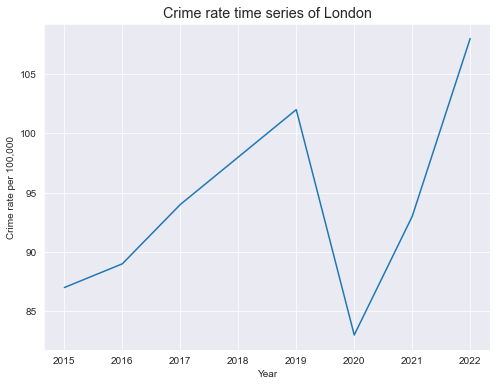

In [21]:
#Plotting a time series graph to show the crime rate since 2015
fig, ax1 = plt.subplots(1, figsize=(8, 6))
plt.title('Crime rate time series of London', fontsize='x-large')
plt.xlabel('Year')
plt.ylabel('Crime rate per 100,000')
plt.plot('Year','Crime Rate',data=Crime_rate)
plt.show()
#fig.savefig('crime.png', dpi=300, bbox_inches='tight', facecolor='white')

Text(0.5, 1.0, 'Crime count of London in the last 24 Months')

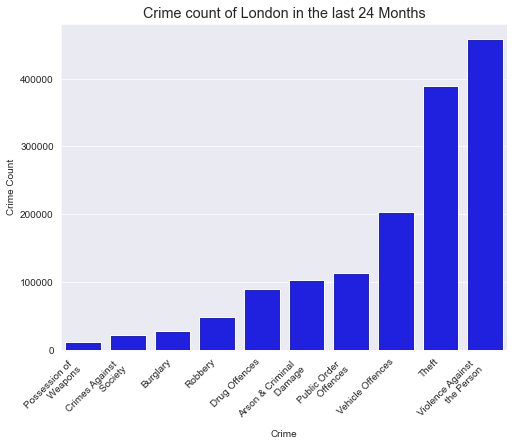

In [22]:
#Setting the subplot so that i can make alterations to the labels and titles
fig, ax1 = plt.subplots(1, figsize=(8, 6))
# Making the barplot itself using seaborn
sns.barplot(x='Crime',
            y='Crime Count',
            data=Crime_count,
            color='blue')
# set the ticks first
ax1.set_xticks(range(10))
# set the labels
ax1.set_xticklabels(['Possession of \n Weapons',
                     'Crimes Against \n Society',
                     'Burglary',
                     'Robbery',
                     'Drug Offences',
                     'Arson & Criminal \n Damage',
                     'Public Order \n Offences',
                     'Vehicle Offences',
                     'Theft',
                     'Violence Against \n the Person'], rotation = 45, ha='right')
#Set the title
plt.title('Crime count of London in the last 24 Months', fontsize='x-large')
#Save the figure
# fig.savefig('crime_count.png', dpi=500, bbox_inches='tight', facecolor='white')

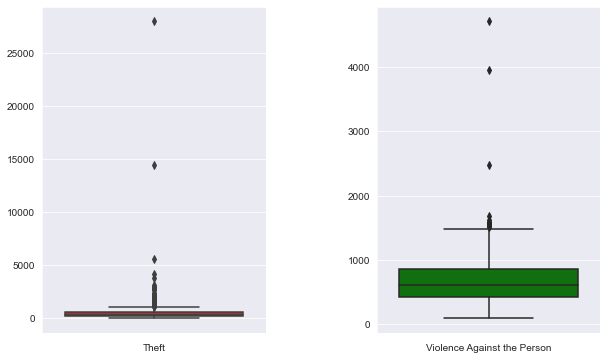

In [23]:
#Creating some boxplots to looks at the distribution of the crimes at the Ward level
# Looking at the top 2

# initialize figure with 4 subplots in a row
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# add padding between the subplots
plt.subplots_adjust(wspace=0.5)

# draw boxplot for age in the 1st subplot
sns.boxplot(data=df_joined['Theft'], ax=ax[0], color='brown',)
ax[0].set_xlabel('Theft')

# draw boxplot for station_distance in the 2nd subplot
sns.boxplot(data=df_joined['Violence_Against_the_Person'], ax=ax[1], color='g')
ax[1].set_xlabel('Violence Against the Person')

# by default, you'll see x-tick label set to 0 in each subplot
# remove it by setting it to empty list
for subplot in ax:
    subplot.set_xticklabels([])

fig.savefig('boxplot_of_highest_crimes_ward_level.png', dpi=500, bbox_inches='tight', facecolor='white')

plt.show()

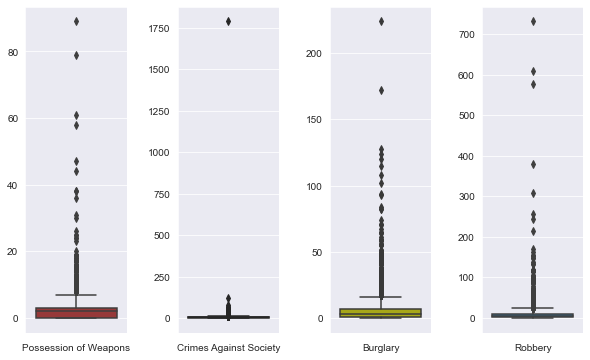

In [24]:
#Creating some boxplots to looks at the distribution of the crimes in the LSOA's

# initialize figure with 4 subplots in a row
fig, ax = plt.subplots(1, 4, figsize=(10, 6))

# add padding between the subplots
plt.subplots_adjust(wspace=0.5)

# draw boxplot for age in the 1st subplot
sns.boxplot(data=LSOA_map_g['Possession_of_Weapons'], ax=ax[0], color='brown',)
ax[0].set_xlabel('Possession of Weapons')

# draw boxplot for station_distance in the 2nd subplot
sns.boxplot(data=LSOA_map_g['Crimes_Against_Society'], ax=ax[1], color='g')
ax[1].set_xlabel('Crimes Against Society')

# draw boxplot for stores_count in the 3rd subplot
sns.boxplot(data=LSOA_map_g['Burglary'], ax=ax[2], color='y')
ax[2].set_xlabel('Burglary')

# finally draw boxplot for unit_price in the 4th subplot
sns.boxplot(data=LSOA_map_g['Robbery'], ax=ax[3])
ax[3].set_xlabel('Robbery')

# by default, you'll see x-tick label set to 0 in each subplot
# remove it by setting it to empty list
for subplot in ax:
    subplot.set_xticklabels([])

plt.show()

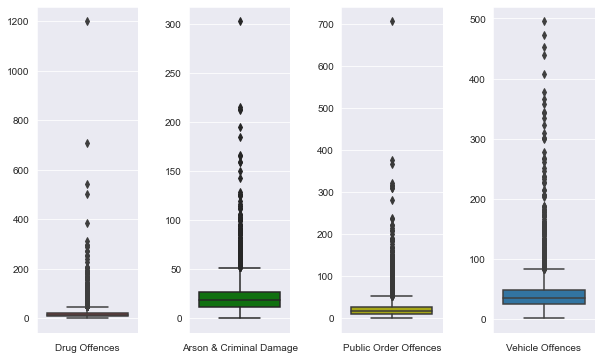

In [25]:
#Looking at the middle 4 crimes by frequency of box plots

# initialize figure with 4 subplots in a row
fig, ax = plt.subplots(1, 4, figsize=(10, 6))

# add padding between the subplots
plt.subplots_adjust(wspace=0.5)

# draw boxplot for age in the 1st subplot
sns.boxplot(data=LSOA_map_g['Drug_Offences'], ax=ax[0], color='brown', )
ax[0].set_xlabel('Drug Offences')

# draw boxplot for station_distance in the 2nd subplot
sns.boxplot(data=LSOA_map_g['Arson_and_Criminal_Damage'], ax=ax[1], color='g')
ax[1].set_xlabel('Arson & Criminal Damage')

# draw boxplot for stores_count in the 3rd subplot
sns.boxplot(data=LSOA_map_g['Public_Order_Offences'], ax=ax[2], color='y')
ax[2].set_xlabel('Public Order Offences')

# finally draw boxplot for unit_price in the 4th subplot
sns.boxplot(data=LSOA_map_g['Vehicle_Offences'], ax=ax[3])
ax[3].set_xlabel('Vehicle Offences')

# by default, you'll see x-tick label set to 0 in each subplot
# remove it by setting it to empty list
for subplot in ax:
    subplot.set_xticklabels([])

plt.show()

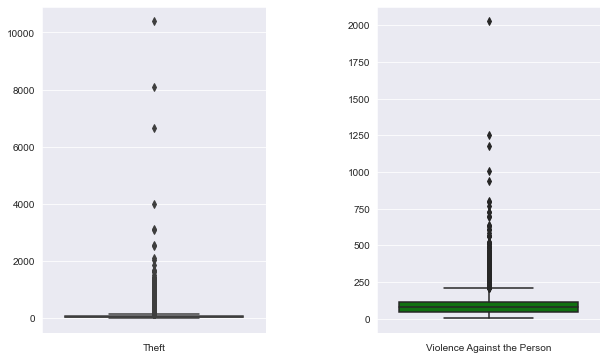

In [26]:
# Looking at the top 2

# initialize figure with 4 subplots in a row
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# add padding between the subplots
plt.subplots_adjust(wspace=0.5)

# draw boxplot for age in the 1st subplot
sns.boxplot(data=LSOA_map_g['Theft'], ax=ax[0], color='brown',)
ax[0].set_xlabel('Theft')

# draw boxplot for station_distance in the 2nd subplot
sns.boxplot(data=LSOA_map_g['Violence_Against_the_Person'], ax=ax[1], color='g')
ax[1].set_xlabel('Violence Against the Person')

# by default, you'll see x-tick label set to 0 in each subplot
# remove it by setting it to empty list
for subplot in ax:
    subplot.set_xticklabels([])

fig.savefig('boxplot_of_highest_crimes.png', dpi=500, bbox_inches='tight', facecolor='white')

plt.show()

### 5. Mapping the crime

This part of the notebook is going to focus on visualising the data from a spatial perspective. This involves grouping the data by defined geographical boundaries within london of differing spatial scales and attributing the relevant data.

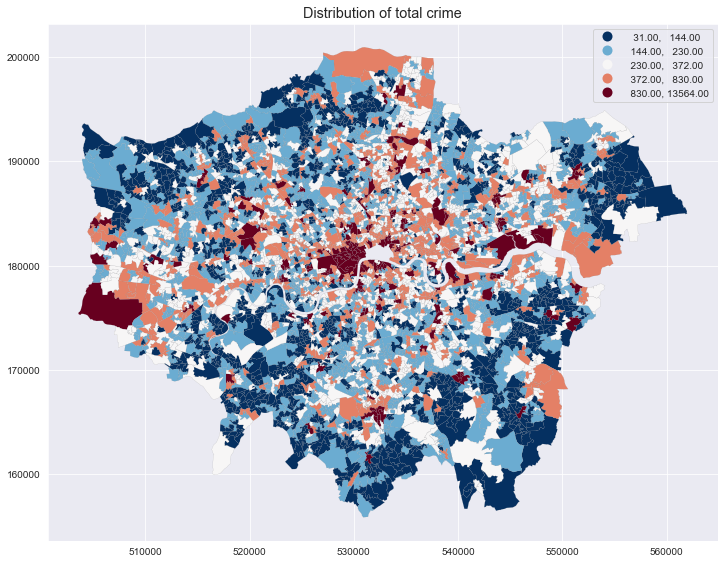

In [27]:
## Full plot of total crimes around London

fig, ax1 = plt.subplots(1, figsize=(12, 10))

LSOA_map_g.plot(column='total_crime', ax=ax1,
                cmap = 'RdBu_r',scheme='jenkscaspallsampled',
                edgecolor='grey', linewidth=0.1,        #change line style
                legend=True)

#Set the title
plt.title('Distribution of total crime', fontsize='x-large')

fig.savefig('total_crime.png', dpi=500, bbox_inches='tight', facecolor='white')

plt.show()

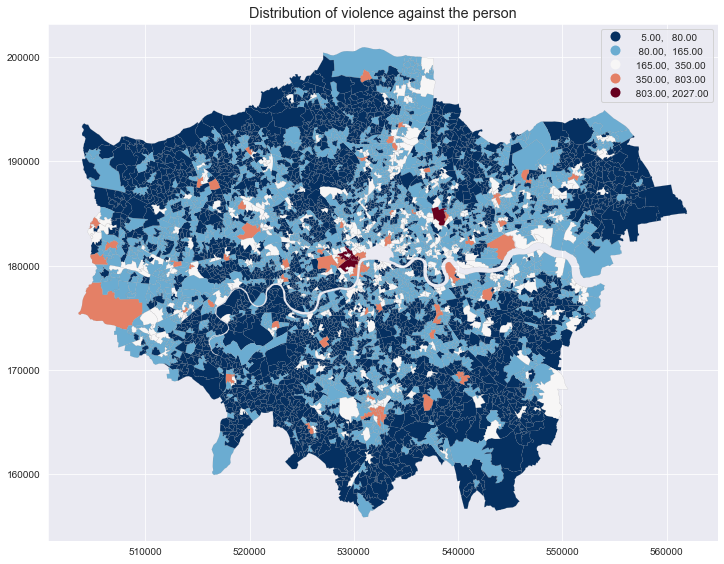

In [28]:
#First plot looking at a specific crime

fig, ax1 = plt.subplots(1, figsize=(12, 10))

LSOA_map_g.plot(column='Violence_Against_the_Person', ax=ax1,
                cmap = 'RdBu_r',scheme='fisherjenks',
                edgecolor='grey', linewidth=0.1,        #change line style
                legend=True)

#Set the title
plt.title('Distribution of violence against the person', fontsize='x-large')

fig.savefig('Crime_violence_map.png', dpi=500, bbox_inches='tight', facecolor='white')
plt.show()

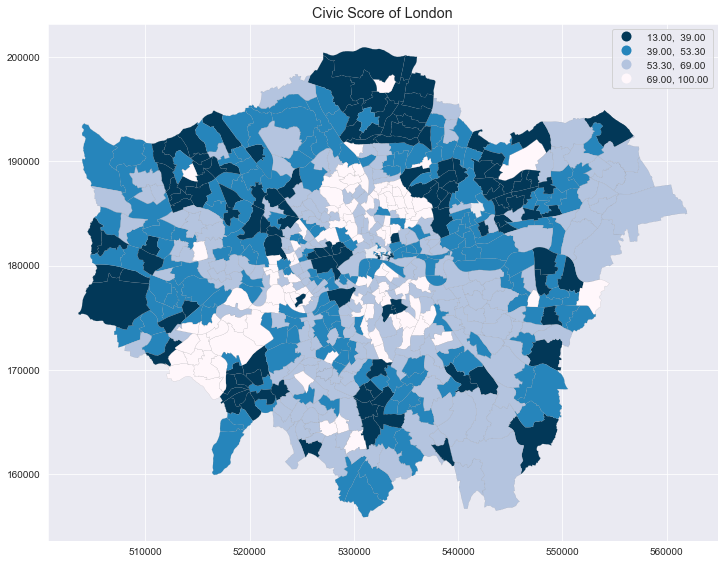

In [29]:
#Plotting my own Civic score map

fig, ax1 = plt.subplots(1, figsize=(12, 10))

gdf_civic.plot(column='Civic_score', ax=ax1,
               cmap = 'PuBu_r',scheme='fisherjenks', k=4,
               edgecolor='grey', linewidth=0.1,        #change line style
               legend=True)

#Set the title
plt.title('Civic Score of London', fontsize='x-large')

fig.savefig('civic_map.png', dpi=500, bbox_inches='tight', facecolor='white')

5.1. Spatial auto-correlation building

In [30]:
spatial_lsoa = LSOA_map_g[['geometry','total_crime','lsoa11cd','lsoa11nm']]

In [31]:
# Generate W from the GeoDataFrame
w = weights.distance.KNN.from_dataframe(spatial_lsoa, k=12)
# Row-standardization
w.transform = "R"

<AxesSubplot:ylabel='Density'>

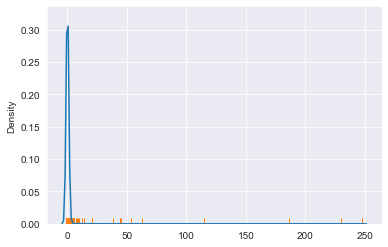

In [32]:
lisa = esda.moran.Moran_Local(spatial_lsoa["total_crime"], w)
# Draw KDE line
ax = seaborn.kdeplot(lisa.Is)
# Add one small bar (rug) for each observation
# along horizontal axis
seaborn.rugplot(lisa.Is, ax=ax)

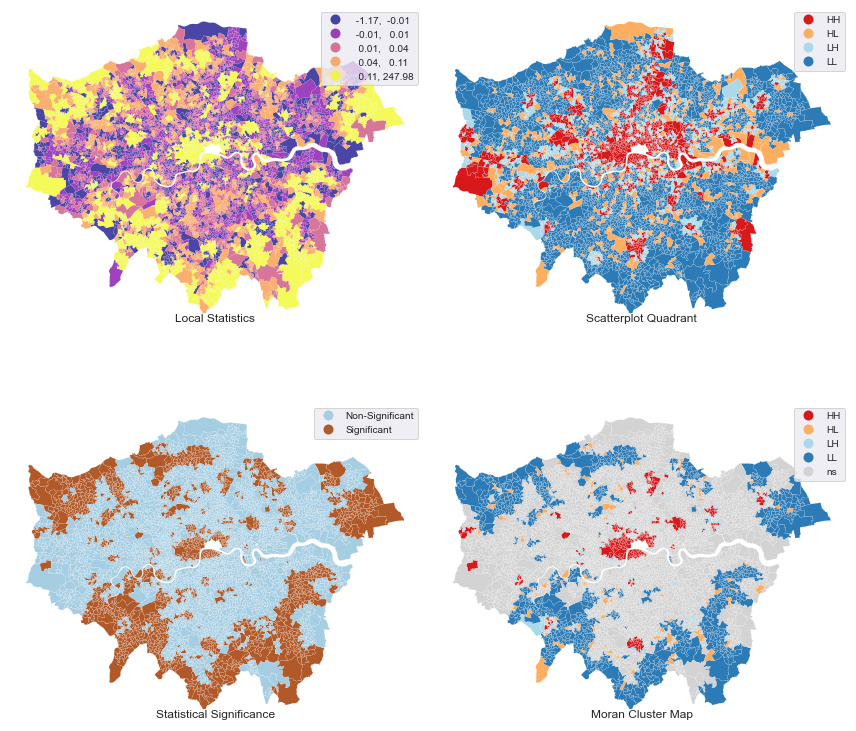

In [33]:
# Set up figure and axes
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()

# Subplot 1 #
# Choropleth of local statistics
# Grab first axis in the figure
ax = axs[0]
# Assign new column with local statistics on-the-fly
spatial_lsoa.assign(
    Is=lisa.Is
    # Plot choropleth of local statistics
).plot(
    column="Is",
    cmap="plasma",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.1,
    alpha=0.75,
    legend=True,
    ax=ax,
)

# Subplot 2 #
# Quadrant categories
# Grab second axis of local statistics
ax = axs[1]
# Plot Quandrant colors (note to ensure all polygons are assigned a
# quadrant, we "trick" the function by setting significance level to
# 1 so all observations are treated as "significant" and thus assigned
# a quadrant color
esdaplot.lisa_cluster(lisa, spatial_lsoa, p=1, ax=ax)

# Subplot 3 #
# Significance map
# Grab third axis of local statistics
ax = axs[2]
#
# Find out significant observations
labels = pandas.Series(
    1 * (lisa.p_sim < 0.05),  # Assign 1 if significant, 0 otherwise
    index=spatial_lsoa.index  # Use the index in the original data
    # Recode 1 to "Significant and 0 to "Non-significant"
).map({1: "Significant", 0: "Non-Significant"})
# Assign labels to `db` on the fly
spatial_lsoa.assign(
    cl=labels
    # Plot choropleth of (non-)significant areas
).plot(
    column="cl",
    categorical=True,
    k=2,
    cmap="Paired",
    linewidth=0.1,
    edgecolor="white",
    legend=True,
    ax=ax,
)


# Subplot 4 #
# Cluster map
# Grab second axis of local statistics
ax = axs[3]
# Plot Quandrant colors In this case, we use a 5% significance
# level to select polygons as part of statistically significant
# clusters
esdaplot.lisa_cluster(lisa, spatial_lsoa, p=0.05, ax=ax)

# Figure styling #
# Set title to each subplot
for i, ax in enumerate(axs.flatten()):
    ax.set_axis_off()
    ax.set_title(
        [
            "Local Statistics",
            "Scatterplot Quadrant",
            "Statistical Significance",
            "Moran Cluster Map",
        ][i],
        y=0,
    )
# Tight layout to minimise in-between white space
f.tight_layout()

f.savefig('Spatial_autocorellation.png', dpi=500, bbox_inches='tight', facecolor='white')
# Display the figure
plt.show()

In [34]:
counts = pandas.value_counts(lisa.q)
(lisa.p_sim < 0.05).sum() * 100 / len(lisa.p_sim)
# it means around 30% of London are considered to be part of a spatial cluster

27.66618347483951